# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [3]:
# Ejercicio 2: descarga HTML
url = "https://companies-market-cap-copy.vercel.app/index.html"
response = requests.get(url, time.sleep(3))
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

soup



<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/img/ic

In [ ]:
# Ejercico 3: Transforma el HTML

tables = soup.find_all('table')

if tables:
    table = tables[0]  
    
    data = []
    rows = table.find_all('tr') 

    for row in rows[1:]:
        columns = row.find_all('td')  # Encuentra todas las columnas en la fila
        if len(columns) > 1:  # Aseguramos que la fila tiene al menos 2 columnas
            year = columns[0].text.strip()  
            growth = columns[1].text.strip()  
            data.append({'year': year, 'growth': growth})
data

       
df = pd.DataFrame(data)
print(df)



    year    growth
0   2024  $97.15 B
1   2023  $96.77 B
2   2022  $81.46 B
3   2021  $53.82 B
4   2020  $31.53 B
5   2019  $24.57 B
6   2018  $21.46 B
7   2017  $11.75 B
8   2016   $7.00 B
9   2015   $4.04 B
10  2014   $3.19 B
11  2013   $2.01 B
12  2012   $0.41 B
13  2011   $0.20 B
14  2010   $0.11 B
15  2009   $0.11 B


In [ ]:
#Ejercicio 4: Procesa el DataFrame
def limpiar_valores(valor):
    if isinstance(valor, str):  # Verificar si el valor es una cadena
        valor = valor.replace("$", "").replace(",", "").replace("B", "").strip()
    return valor
df['growth'] = df['growth'].apply(limpiar_valores)


print(df)

    year        growth
0   2024  9.715000e+10
1   2023  9.677000e+10
2   2022  8.146000e+10
3   2021  5.382000e+10
4   2020  3.153000e+10
5   2019  2.457000e+10
6   2018  2.146000e+10
7   2017  1.175000e+10
8   2016  7.000000e+09
9   2015  4.040000e+09
10  2014  3.190000e+09
11  2013  2.010000e+09
12  2012  4.100000e+08
13  2011  2.000000e+08
14  2010  1.100000e+08
15  2009  1.100000e+08


In [ ]:
#Ejercicio 5: Almacena los datos en sqlite

conn = sqlite3.connect("tesla_revenues.db")
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS growth_data (
        year INTEGER,
        growth REAL
    )
''')

data_to_insert = df.values.tolist()

cursor.executemany('''
    INSERT INTO growth_data (year, growth) VALUES (?, ?)
''', data_to_insert)

conn.commit()

cursor.execute('SELECT * FROM growth_data')
rows = cursor.fetchall()

# Mostrar los resultados
for row in rows:
    print(row)

conn.close()

(2024, 97150000000.0)
(2023, 96770000000.0)
(2022, 81460000000.0)
(2021, 53820000000.0)
(2020, 31530000000.0)
(2019, 24570000000.0)
(2018, 21460000000.0)
(2017, 11750000000.0)
(2016, 7000000000.0)
(2015, 4040000000.0)
(2014, 3190000000.0)
(2013, 2009999999.9999998)
(2012, 410000000.0)
(2011, 200000000.0)
(2010, 110000000.0)
(2009, 110000000.0)


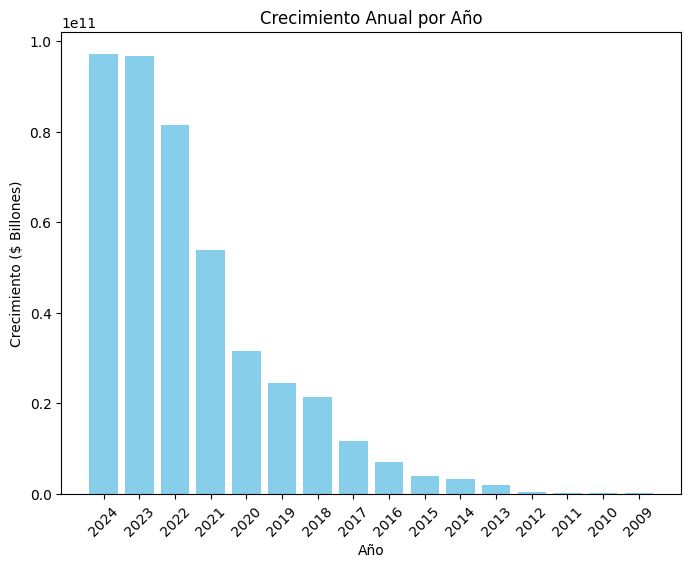

In [ ]:
#Ejercicio 6: Visualiza los datos

plt.figure(figsize=(8, 6))
plt.bar(df['year'], df['growth'], color='skyblue')
plt.title('Crecimiento Anual por Año')
plt.xlabel('Año')
plt.ylabel('Crecimiento ($ Billones)')
plt.xticks(rotation=45)
plt.show()


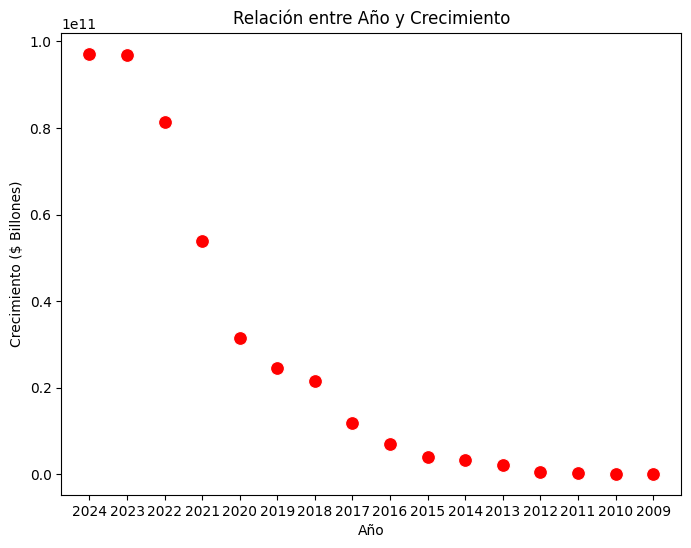

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='year', y='growth', data=df, color='red', s=100)
plt.title('Relación entre Año y Crecimiento')
plt.xlabel('Año')
plt.ylabel('Crecimiento ($ Billones)')
plt.show()


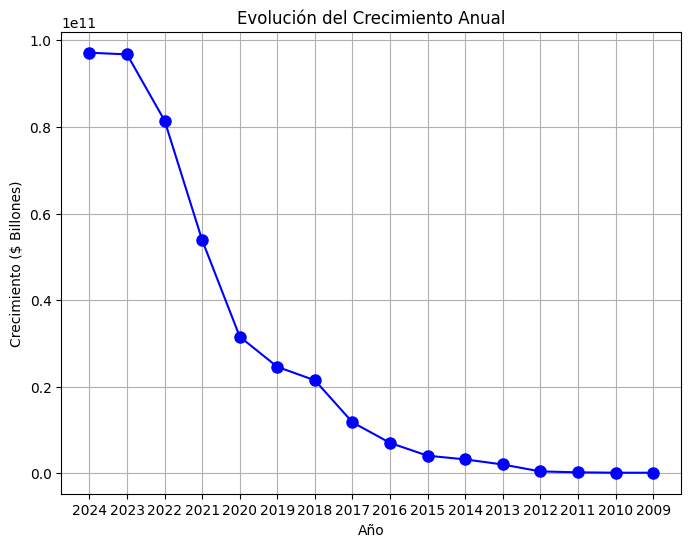

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(df['year'], df['growth'], marker='o', color='b', linestyle='-', markersize=8)
plt.title('Evolución del Crecimiento Anual')
plt.xlabel('Año')
plt.ylabel('Crecimiento ($ Billones)')
plt.grid(True)
plt.show()